In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Dataset

In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
df = pd.read_csv(url)

Preparing the dataset

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
mask = ['ram', 'storage', 'screen', 'final_price']

df_new = df[mask]

Exploratory Data Analysis (EDA)

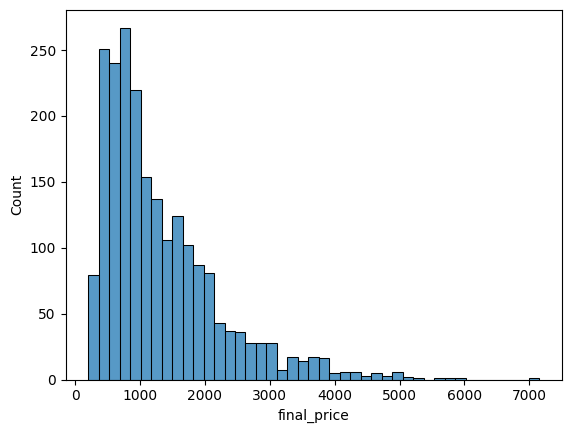

In [5]:
sns.histplot(df['final_price']);

In [6]:
df_new.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [7]:
df_new.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [8]:
df_new['ram'].median()

np.float64(16.0)

Prepare and split the dataset

In [9]:
n = len(df_new)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [10]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

In [11]:
df_train = df_new.iloc[idx[:n_train]]
df_val = df_new.iloc[idx[n_train:n_train+n_val]]
df_test = df_new.iloc[idx[n_train+n_val:]]

In [12]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = df_train.final_price
y_val = df_val.final_price
y_test = df_test.final_price

In [15]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

Filling NAs

In [16]:
def train_linear_regression(X, y):
    one = np.ones(X.shape[0])
    X = np.column_stack([one, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [17]:
def prepare_X(df):
    df = df.fillna(0)
    X = df.values
    return X

mean_values = df_train.mean()
screen_mean = mean_values['screen']

def prepare_mean_na(df):
    df = df.fillna(screen_mean)
    X = df.values
    return X

In [18]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    rmse_error = np.sqrt(mse)
    return rmse_error

In [19]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),5)

np.float64(597.36356)

In [20]:
X_train = prepare_mean_na(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_mean_na(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),5)

np.float64(600.26503)